In [1]:
import numpy as np
import pickle
import math
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
#################################################################################################
#                                                                                               #
# Preprocessing functions that can be useful for NLP projects.  I have broken out all of the    #
# individual functions so each can be independently tested if we want to.  I have created a     #
# normalize function that does the basic combination of proprocessing steps like lowercase,     #
# whitespace cleaning, etc.  I then created a Preprocessing function that uses normalize and    #
# then removes the stopwords and lemmatizes.                                                    #
#################################################################################################

# import the necessary libraries
import re
import string

import contractions
import inflect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
#nltk.download('wordnet')
#nltk.download('omw-1.4')


# Lowercase the text function
def text_lowercase(text):
    return text.lower()


# Remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result


# convert numbers into words
def convert_number(text):
    inflect_engine = inflect.engine()

    # split string into list of words
    temp_str = text.split()
    # initialise empty list
    new_string = []

    for word in temp_str:
        # if word is a digit, convert the digit
        # to numbers and append into the new_string list
        if word.isdigit():
            temp = inflect_engine.number_to_words(word)
            new_string.append(temp)

        # append the word as it is
        else:
            new_string.append(word)

    # join the words of new_string to form a string
    temp_str = ' '.join(new_string)
    return temp_str


# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


# remove whitespace from text
def remove_whitespace(text):
    return " ".join(text.split())


# Replace contractions in string of text
def replace_contractions(text):
    return contractions.fix(text)


# Remove URLs from a sample string
def remove_URL(sample):
    result = sample
    if type(sample) != str:
        result= str(sample)
    return re.sub(r"http\S+", "", result)
    

# remove stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text


# Check if each character in string is ASCII
# The first 128 unicode code points represent the ASCII characters.
def remove_non_ascii(text):
    return ''.join(char for char in text if ord(char) < 128)


# Lemmatize verbs in list of tokenized words
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []

    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)

    return lemmas


def normalize(words):
    words = remove_URL(words)
    words = remove_non_ascii(words)
    words = text_lowercase(words)
    words = remove_punctuation(words)
    words = remove_whitespace(words)
    words = replace_contractions(words)
    words = remove_numbers(words)

    return words


# Preprocess text
def preprocess_text(corpus):
    # Normalize all the text
    text = normalize(corpus)

    # Remove the stop words
    text = remove_stopwords(text)
    #
    # # Lemmatize and tokenize the text
    text = lemmatize_verbs(text)

    return text

In [3]:
def listToString(s):
 
    # initialize an empty string
    str1 = ""
 
    # traverse in the string
    for ele in s:
        str1 += ele + " "
 
    # return string
    return str1

In [5]:
unclean_insurance_data = pd.read_csv(".\data\InjuryCauseTopThirteen.csv")
print("rdy")

rdy


In [6]:
unclean_insurance_data.head()

,injuryCauseDesc,InjuryDesc
0,Struck by falling object,DOING SECURITY ON THE PIER FOR PAINTING OF WHA...
1,"Bending, climbing, crawling, reaching, twisting",IW WAS MOVING A CARTON OF SHAVING CREAM AND HA...
2,"Bending, climbing, crawling, reaching, twisting",PICKING UP BOXES OF FILES AND HURT LOWER BACK
3,Struck by falling object,BEAM SLIPPED AND STRUCK EE'S RIGHT WRIST.
4,Overexertion in lifting,EMPLOYEE STATED THAT HE FELT STRAIN IN HIS LOW...


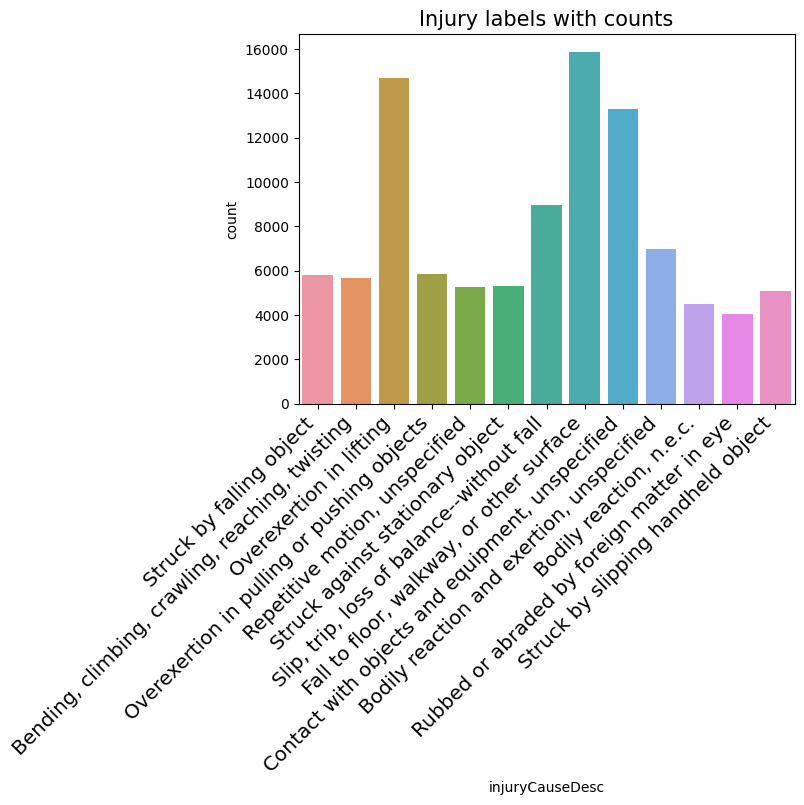

In [7]:
plt.figure(figsize = None)
chart = sns.countplot(x = 'injuryCauseDesc', data = unclean_insurance_data)
plt.title("Injury labels with counts", fontsize = 15)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

In [9]:
unclean_insurance_data.injuryCauseDesc.value_counts()

Fall to floor, walkway, or other surface           15882
Overexertion in lifting                            14716
Contact with objects and equipment, unspecified    13317
Slip, trip, loss of balance--without fall           8953
Bodily reaction and exertion, unspecified           6972
Overexertion in pulling or pushing objects          5868
Struck by falling object                            5796
Bending, climbing, crawling, reaching, twisting     5673
Struck against stationary object                    5329
Repetitive motion, unspecified                      5257
Struck by slipping handheld object                  5102
Bodily reaction, n.e.c.                             4509
Rubbed or abraded by foreign matter in eye          4037
Name: injuryCauseDesc, dtype: int64

In [10]:
min_samples = 200

fall  = unclean_insurance_data[unclean_insurance_data['injuryCauseDesc'] =='Fall to floor, walkway, or other surface'].sample(min_samples, random_state = 2022)
over_lift = unclean_insurance_data[unclean_insurance_data['injuryCauseDesc'] =='Overexertion in lifting'].sample(min_samples, random_state = 2022)
contact  = unclean_insurance_data[unclean_insurance_data['injuryCauseDesc'] =='Contact with objects and equipment, unspecified'].sample(min_samples, random_state = 2022)
slip = unclean_insurance_data[unclean_insurance_data['injuryCauseDesc'] =='Slip, trip, loss of balance--without fall'].sample(min_samples, random_state = 2022)
bodily = unclean_insurance_data[unclean_insurance_data['injuryCauseDesc'] =='Bodily reaction and exertion, unspecified'].sample(min_samples, random_state = 2022)
over_pull = unclean_insurance_data[unclean_insurance_data['injuryCauseDesc'] =='Overexertion in pulling or pushing objects'].sample(min_samples, random_state = 2022)
struck_fall = unclean_insurance_data[unclean_insurance_data['injuryCauseDesc'] =='Struck by falling object'].sample(min_samples, random_state = 2022)
bending = unclean_insurance_data[unclean_insurance_data['injuryCauseDesc'] =='Bending, climbing, crawling, reaching, twisting'].sample(min_samples, random_state = 2022)
struck_against = unclean_insurance_data[unclean_insurance_data['injuryCauseDesc'] =='Struck against stationary object'].sample(min_samples, random_state = 2022)
repetitive_motion  = unclean_insurance_data[unclean_insurance_data['injuryCauseDesc'] =='Repetitive motion, unspecified'].sample(min_samples, random_state = 2022)
struck_slip  = unclean_insurance_data[unclean_insurance_data['injuryCauseDesc'] =='Struck by slipping handheld object'].sample(min_samples, random_state = 2022)
bodily_reaction  = unclean_insurance_data[unclean_insurance_data['injuryCauseDesc'] =='Bodily reaction, n.e.c.'].sample(min_samples, random_state = 2022)
rubbed = unclean_insurance_data[unclean_insurance_data['injuryCauseDesc'] =='Rubbed or abraded by foreign matter in eye'].sample(min_samples, random_state = 2022)



In [10]:
np.where(pd.isnull(unclean_insurance_data))

(array([], dtype=int64), array([], dtype=int64))

In [249]:
balanced_insurance_df2 = pd.concat([fall, over_lift, contact, slip, bodily, over_pull, 
                                   struck_fall, bending, struck_against, repetitive_motion,
                                   struck_slip, bodily_reaction, rubbed])
balanced_insurance_df2.injuryCauseDesc.value_counts()

Fall to floor, walkway, or other surface           200
Overexertion in lifting                            200
Contact with objects and equipment, unspecified    200
Slip, trip, loss of balance--without fall          200
Bodily reaction and exertion, unspecified          200
Overexertion in pulling or pushing objects         200
Struck by falling object                           200
Bending, climbing, crawling, reaching, twisting    200
Struck against stationary object                   200
Repetitive motion, unspecified                     200
Struck by slipping handheld object                 200
Bodily reaction, n.e.c.                            200
Rubbed or abraded by foreign matter in eye         200
Name: injuryCauseDesc, dtype: int64

In [250]:
data = []

for word in balanced_insurance_df2.InjuryDesc:
    
    clean = preprocess_text(word)
    clean2 = listToString(clean)
    data.append(clean2)

In [251]:
print(data[:10])

['employee slip walkway walk work ', 'walk outside walk way park lot fell pot hole drop knee somersault twice shoulder scrap knee ', 'employee get car go customers business get car step pot hole pavement fell grind fracture right arm ', 'tracy walk front doors hotel construction zone trip tarp lay grind fell leave hand ', 'get car slip snow cover rock fell buttocks start pain lower back ', 'korin come back break slip wet floor hold ice cream hand large yellow safety mop bucket visible time fall location fall ', 'employee cook griddle slip paper bag fall floor slip fell try catch way land buttocks back fell leave knee pop place ', 'tonya walk along woods path cabin grind wet muddy weather rain trip wet tree root slip fell weight body top leave ankle twist ankle ', 'employee slip floor fell knee ', 'employee slip ice go hill result pain back right side ']


In [252]:
balanced_insurance_df2.insert(loc=2, column="InjuryDesc_clean", value=data)

In [253]:
balanced_insurance_df2.head()

,injuryCauseDesc,InjuryDesc,InjuryDesc_clean
89816,"Fall to floor, walkway, or other surface",EMPLOYEE SLIPPED ON WALKWAY WHILE WALKING INTO...,employee slip walkway walk work
80629,"Fall to floor, walkway, or other surface",WALKING OUTSIDE ON WALK WAY TO PARKING LOT - F...,walk outside walk way park lot fell pot hole d...
43773,"Fall to floor, walkway, or other surface",EMPLOYEE WAS GETTING OUT OF CAR TO GO INTO A C...,employee get car go customers business get car...
81839,"Fall to floor, walkway, or other surface",TRACY WAS WALKING IN THE FRONT DOORS OF THE HO...,tracy walk front doors hotel construction zone...
14579,"Fall to floor, walkway, or other surface",GETTING OUT OF CAR - SLIPPED ON SNOW COVERED R...,get car slip snow cover rock fell buttocks sta...


In [254]:
vectorizer = TfidfVectorizer()
X_clean = vectorizer.fit_transform(data)
print('rdy')

rdy


In [255]:
from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsne = TSNE(n_components = 2, perplexity=20)
data_2d = tsne.fit_transform(X_clean)
print('rdy2')

c:\users\vmshk\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\vmshk\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


rdy2


In [179]:
print('rdy')

rdy


2600


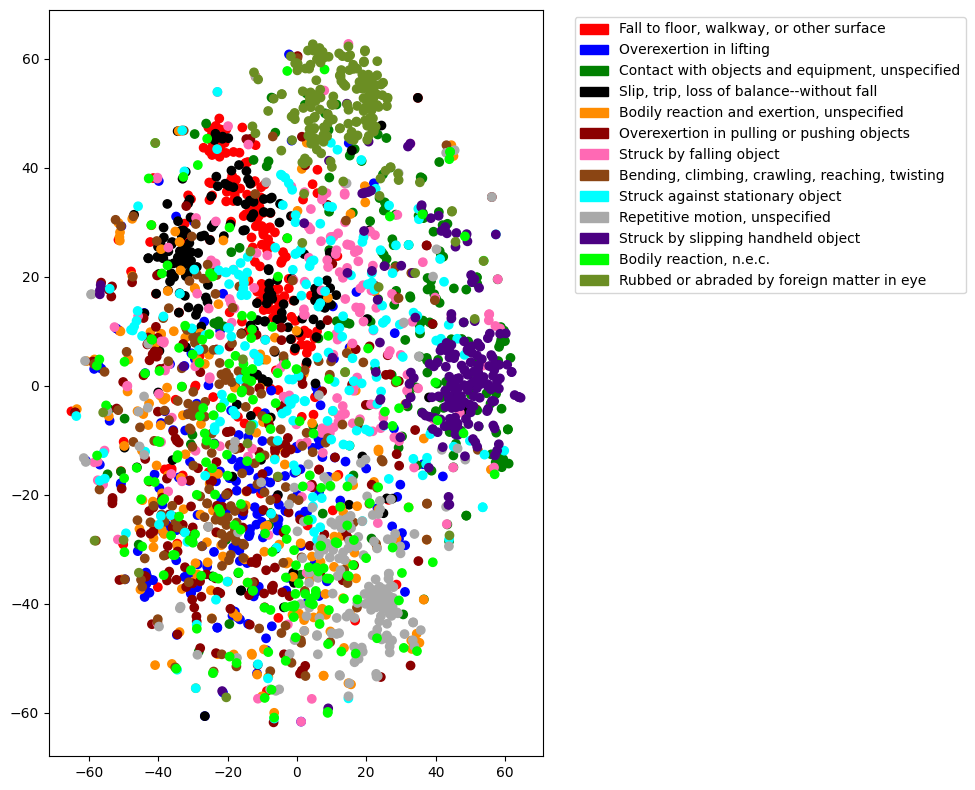

rdy3


In [257]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


annots = []
c = []
n=2
for i in range(1300*n):
    x = str(i)
    word = ('d'+x)
    annots.append(word)
    if i < 100*n:
        c.append('r')
    if i >= 100*n and i <200*n:
        c.append('b')
    if i >= 200*n and i <300*n:
        c.append('g')
    if i >= 300*n and i <400*n:
        c.append('black')
    if i >= 400*n and i <500*n:
        c.append('darkorange')
    if i >= 500*n and i <600*n:
        c.append('darkred')
    if i >= 600*n and i <700*n:
        c.append('hotpink')
    if i >= 700*n and i <800*n:
        c.append('saddlebrown')
    if i >= 800*n and i <900*n:
        c.append('cyan')
    if i >= 900*n and i <1000*n:
        c.append('darkgrey')
    if i >= 1000*n and i <1100*n:
        c.append('indigo')
    if i >= 1100*n and i <=1200*n:
        c.append('lime')
    if i > 1200*n:
        c.append('olivedrab')


print(len(c))

plt.figure(figsize=(10,8))


    
fig = plt.scatter(data_2d[:,0],data_2d[:,1], c= c)
  
    

fall = mpatches.Patch(color='r', label='Fall to floor, walkway, or other surface')
over_lift = mpatches.Patch(color='b', label='Overexertion in lifting') ##
contact = mpatches.Patch(color='g', label='Contact with objects and equipment, unspecified')
slip = mpatches.Patch(color='black', label='Slip, trip, loss of balance--without fall')
bodily = mpatches.Patch(color='darkorange', label='Bodily reaction and exertion, unspecified')
over_pull = mpatches.Patch(color='darkred', label='Overexertion in pulling or pushing objects') ##
struck_fall = mpatches.Patch(color='hotpink', label='Struck by falling object')
bending = mpatches.Patch(color='saddlebrown', label='Bending, climbing, crawling, reaching, twisting')
struck_against = mpatches.Patch(color='cyan', label='Struck against stationary object')  #
repetitive_motion = mpatches.Patch(color='darkgrey', label='Repetitive motion, unspecified')
struck_slip = mpatches.Patch(color='indigo', label='Struck by slipping handheld object')  #
bodily_reaction = mpatches.Patch(color='lime', label='Bodily reaction, n.e.c.')
rubbed = mpatches.Patch(color='olivedrab', label='Rubbed or abraded by foreign matter in eye')

plt.legend(bbox_to_anchor = (1.05, 1.0), loc='upper left',handles=[fall, over_lift,contact,slip,bodily,over_pull,struck_fall,bending,struck_against,repetitive_motion,struck_slip,bodily_reaction,rubbed])


plt.tight_layout()  


plt.show()   

print('rdy3')












